In [1]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
print(os.listdir("../"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
from tqdm import tqdm

['neu', 'sample_submission.csv', 'severstal-steel-defect-detection.zip', 'steel_defect_detection', 'test_images', 'train.csv', 'train_images']


In [2]:
train_df = pd.read_csv("../train.csv")
sample_df = pd.read_csv("../sample_submission.csv")

In [3]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Text(0.5, 0, 'class')

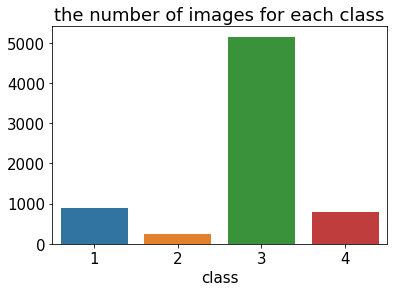

In [4]:
class_dict = train_df['ClassId'].value_counts().to_dict()

fig, ax = plt.subplots()
sns.barplot(x=list(class_dict.keys()), y=list(class_dict.values()), ax=ax)
ax.set_title("the number of images for each class")
ax.set_xlabel("class")

In [5]:
class_per_image = train_df.groupby('ImageId').ClassId.count().sort_values().values

In [6]:
Counter(class_per_image);

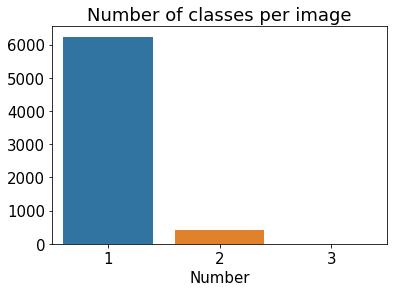

In [7]:
fig, ax = plt.subplots()
sns.barplot(x=list(Counter(class_per_image).keys()), y=list(Counter(class_per_image).values()), ax=ax)
ax.set_title("Number of classes per image")
ax.set_xlabel("Number");

In [8]:
train_size_dict = defaultdict(int)
train_path = Path("../train_images/")
for img_name in train_path.iterdir():
    img = Image.open(img_name)
    train_size_dict[img.size] += 1

In [9]:
train_size_dict

defaultdict(int, {(1600, 256): 12568})

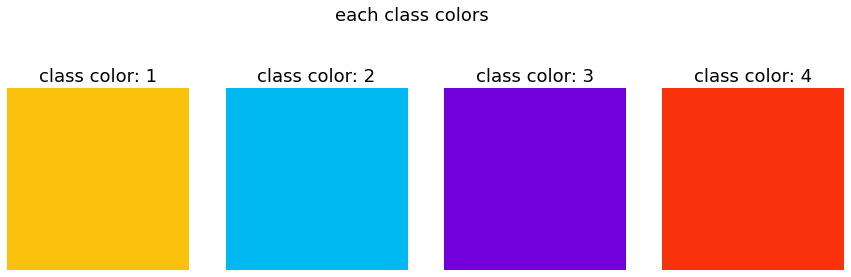

In [10]:
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50,3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))

fig.suptitle("each class colors")
plt.show()

In [11]:
train_df.iloc[0]

ImageId                                              0002cc93b.jpg
ClassId                                                          1
EncodedPixels    29102 12 29346 24 29602 24 29858 24 30114 24 3...
Name: 0, dtype: object

In [20]:
img_ori = cv2.imread(f"../train_images/{train_df.iloc[0].ImageId}")
img = img_ori.copy()

In [21]:
img.shape

(256, 1600, 3)

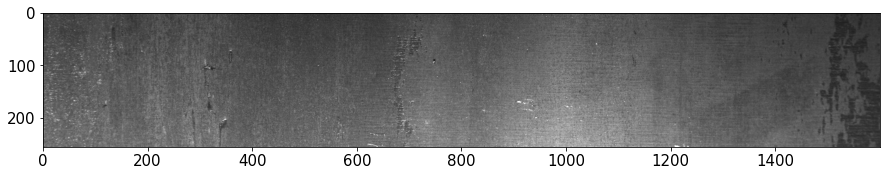

In [22]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img);

In [23]:
rle = train_df.iloc[0].EncodedPixels

In [24]:
starts = rle.split()[0::2]
lengths = rle.split()[1::2]
mask = np.zeros(img.shape[0]*img.shape[1]).astype(np.uint8)
for ind, start in enumerate(starts):
    mask[int(start):(int(start)+int(lengths[ind]))] = 1
mask = mask.reshape((img.shape[0],img.shape[1]),order= 'F')

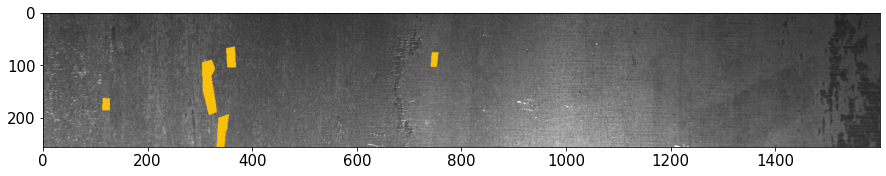

In [25]:
img[mask==1,0] = palet[0][0]
img[mask==1,1] = palet[0][1]
img[mask==1,2] = palet[0][2]
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img);

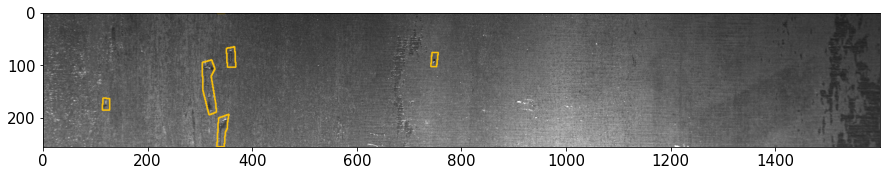

In [27]:
conts, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
img_cont = cv2.drawContours(img_ori,conts,-1,palet[0],2)
fig,ax = plt.subplots(figsize = (15,15))
ax.imshow(img_cont);